# DAY58

昨天我们掌握了AR, MA, 和 ARMA 模型，它们是处理平稳时间序列的利器。但现实世界的数据，比如股票价格、公司销售额，往往带有明显的趋势性或季节性，它们是不平稳的。今天，我们就来学习ARIMA模型，它正是为了解决这个问题而生的。

他进一步引入差分来解决不平稳问题

差分是使数据平稳化的关键步骤。

一阶差分: 就是序列中每个点减去它前一个点的值。
diff(t) = value(t) - value(t-1)
这通常可以消除数据中的线性趋势。

二阶差分: 对一阶差分后的结果再做一次差分。
diff2(t) = diff(t) - diff(t-1)
这可以消除数据中的曲线趋势（比如抛物线趋势）。

## ARIMA建模的完整流程

建立一个ARIMA模型，通常遵循以下步骤：
1. 数据可视化：观察原始时间序列图，判断是否存在趋势或季节性。
2. 平稳性检验：
    - 对原始序列进行ADF检验。
    - 如果p值 > 0.05，说明序列非平稳，需要进行差分。
3. 确定差分次数 d:
    - 进行一阶差分，然后再次进行ADF检验。
    - 如果平稳了，则 d=1。否则，继续差分，直到平稳。
4. 确定 p 和 q:
    - 对差分后的平稳序列绘制ACF和PACF图。
    - 根据昨天学习的规则（PACF定p，ACF定q）来选择p和q的值。
5. 建立并训练ARIMA(p, d, q)模型。
6. 模型评估与诊断：查看模型的摘要信息，检查残差是否为白噪声。
7. 进行预测

# 一、 时序任务经典数据集

就像机器学习有鸢尾花、手写数字、波士顿房价这些“标准”数据集一样，时间序列分析领域也有一些“名人堂”成员。

这些经典数据集之所以经典，是因为它们各自清晰地展示了时间序列中一种或多种核心特征（如趋势、季节性、周期性等），非常适合用来教学和检验模型。

下面介绍几个最著名、最常用的单变量时间序列经典数据集，并附上获取它们的代码。

## 1.1 国际航空乘客数量 (Airline Passengers)

- 数据描述: 1949年到1960年每月国际航空公司的总乘客数量。
- 强趋势性: 随着时间推移，乘客数量有非常明显的线性增长趋势。
- 强季节性: 每年都有一个固定的模式，夏季（6-8月）是高峰，冬季是低谷。
- 变化的方差: 越到后期，季节性波动的幅度越大，这是一种异方差性。


In [30]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_air = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df_air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


这是一种直接使用 URL 在线读取数据集的方式，代码通过pd.read_csv(url)直接从网络 URL 读取数据，Pandas 会自动处理网络请求并加载数据到内存中，属于 “在线读取” 方式。

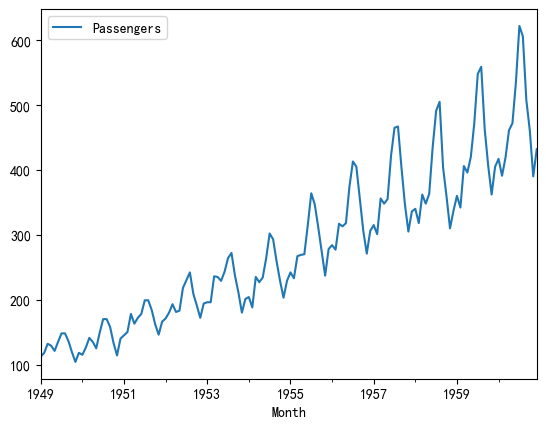

In [31]:
df_air.plot()

这里没有导入matplotlib仍然可以画图，是因为当调用df.plot()时，Pandas 会隐式导入 Matplotlib（如果尚未导入），并使用其绘图接口生成图表。对于简单的可视化需求，无需显式导入 Matplotlib，减少代码量。这里省略了plt.title('xxx')和plt.show()等

## 1.2 太阳黑子数量 (Sunspots)

- 数据描述: 每年观测到的太阳黑子数量。
- 无明显趋势: 长期来看，数据没有持续的上升或下降趋势。
- 强周期性 (Cyclical): 数据呈现非常明显的周期性波动，大约每11年一个周期。注意，这与“季节性”不同，季节性周期是固定的（如12个月），而这里的周期长度是近似的。
- 相对平稳: 经过检验，数据通常被认为是平稳或近似平稳的。

非常适合用来理解ARMA模型。由于数据本身比较平稳，不需要差分，可以专注于用ACF和PACF图来确定 p 和 q 的值。

In [32]:
from statsmodels.datasets import sunspots
df_sun = sunspots.load_pandas().data['SUNACTIVITY']
df_sun.head()


0     5.0
1    11.0
2    16.0
3    23.0
4    36.0
Name: SUNACTIVITY, dtype: float64

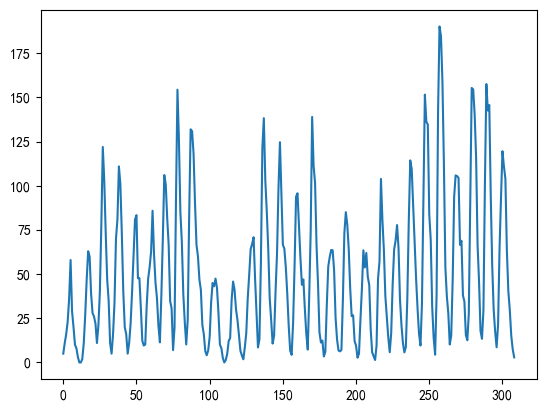

In [33]:
df_sun.plot()

## 1.3 加州每日女性出生数量 (Daily Female Births)

- 数据描述: 1959年，美国加州每一天的女性新生儿数量。
- 无趋势、无季节性: 数据看起来像随机波动，没有明显的趋势或可预测的季节模式。
- 平稳性: ADF检验通常会显示该序列是平稳的。



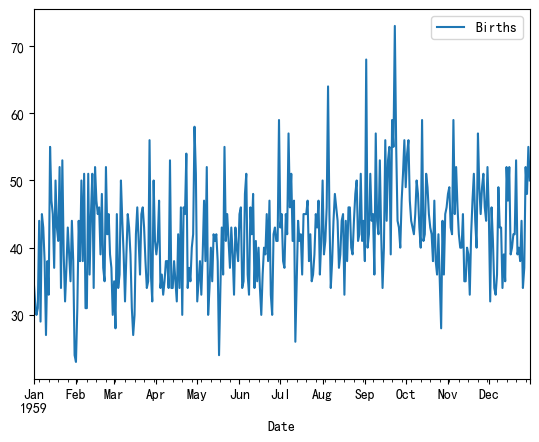

In [34]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df_births = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
# df_births.plot()
df_births.plot()

# 二、时间序列任务实战 


进阶: 使用 太阳黑子 数据，让学员练习用ACF/PACF为ARMA模型定阶。
核心: 用 国际航空乘客 数据，系统地讲解从非平稳到平稳（差分），再到建立ARIMA和SARIMA的全过程。

## 2.1 加州每日女性预测

--- 原始数据预览 ---
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


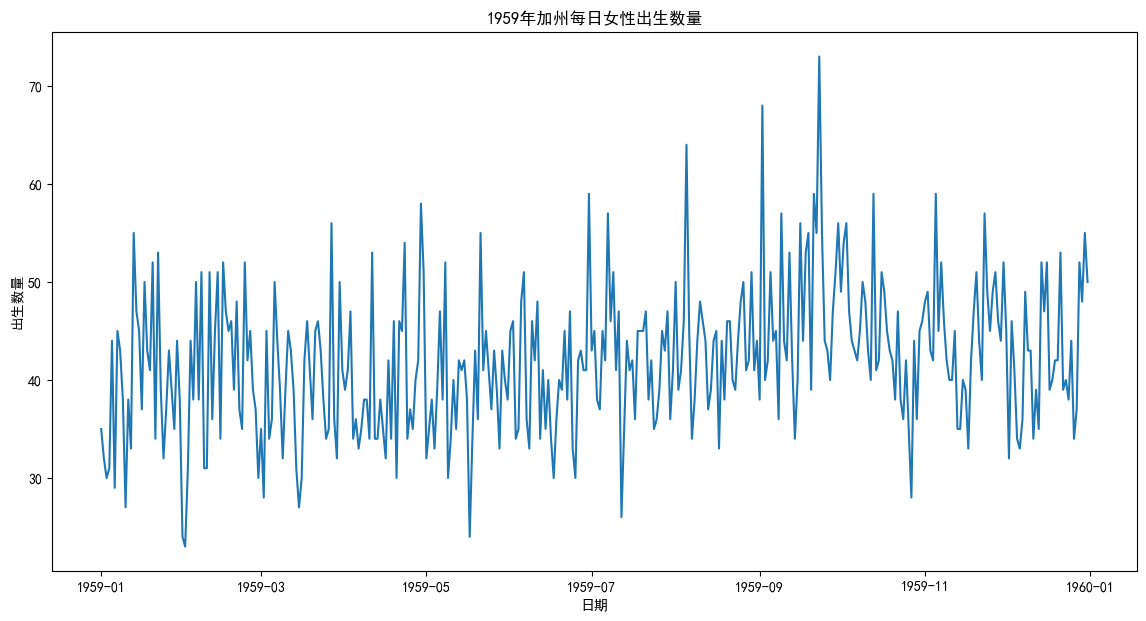

In [35]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 设置matplotlib以正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.columns = ['Births']
ts_data = df['Births']

print("--- 原始数据预览 ---")
print(ts_data.head())

# 绘制时序图
plt.figure(figsize=(14, 7))
plt.plot(ts_data)
plt.title('1959年加州每日女性出生数量')
plt.xlabel('日期')
plt.ylabel('出生数量')
plt.show()


从图上看，数据点在一个稳定的水平线（大约40）上下随机波动。没有明显的上升或下降趋势，也没有看到以周或月为单位的固定模式。这给我们一个初步印象：这个序列很可能是平稳的。

直觉需要被验证。我们使用ADF检验来科学地判断其平稳性。

In [36]:
def adf_test(timeseries):
    print('--- ADF检验结果 ---')
    # H0: 序列非平稳; H1: 序列平稳
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}') # 重点关注这个值
    if result[1] <= 0.05:
        print("结论: 成功拒绝原假设，序列是平稳的。")
    else:
        print("结论: 未能拒绝原假设，序列是非平稳的。")

adf_test(ts_data)


--- ADF检验结果 ---
ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
结论: 成功拒绝原假设，序列是平稳的。


既然数据是平稳的，我们就不需要对它进行差分来“铲平”它。这意味着：差分次数 d = 0

我们现在只需要确定 p 和 q。模型将是 ARIMA(p, 0, q)，这其实就是我们昨天学的 ARMA(p, q) 模型。

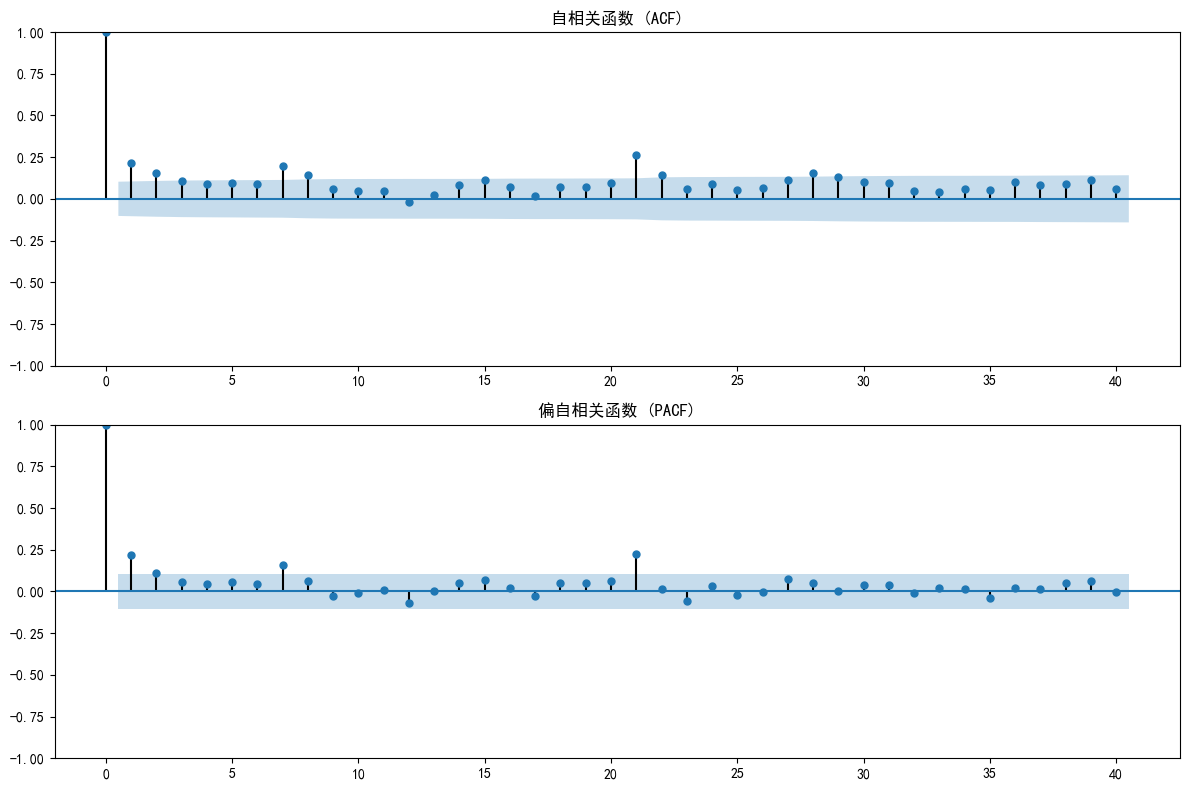

In [37]:
# 因为数据是平稳的，我们直接对原始数据绘制ACF和PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(ts_data, ax=ax1, lags=40)
ax1.set_title('自相关函数 (ACF)')

plot_pacf(ts_data, ax=ax2, lags=40)
ax2.set_title('偏自相关函数 (PACF)')

plt.tight_layout()
plt.show()


- PACF图: 在滞后2阶之后，几乎所有的相关性都落入了蓝色置信区间内，我们可以认为它在 滞后2阶后截尾。这强烈暗示 p=2。
- ACF图: 呈现出拖尾的模式（缓慢下降）。

所以，我们的候选模型是 ARIMA(2, 0, 0)。

                               SARIMAX Results                                
Dep. Variable:                 Births   No. Observations:                  365
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1234.182
Date:                Sun, 29 Jun 2025   AIC                           2476.364
Time:                        16:08:32   BIC                           2491.963
Sample:                    01-01-1959   HQIC                          2482.563
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9816      0.568     73.885      0.000      40.868      43.095
ar.L1          0.1939      0.055      3.544      0.000       0.087       0.301
ar.L2          0.1139      0.055      2.070      0.0

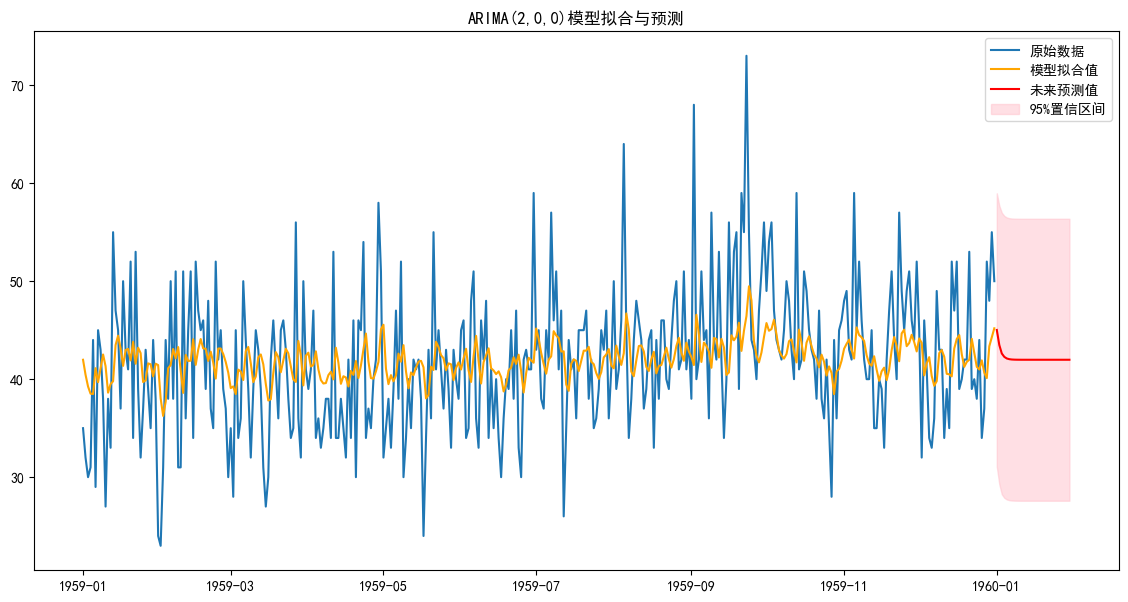

In [38]:
import warnings
warnings.filterwarnings("ignore")
# 建立ARIMA(2, 0, 0)模型
model = ARIMA(ts_data, order=(2, 0, 0))
arima_result = model.fit()

# 打印模型摘要
print(arima_result.summary())

# 让我们预测未来30天
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 绘制结果
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='原始数据')
# 绘制模型在历史数据上的拟合值
plt.plot(arima_result.fittedvalues, color='orange', label='模型拟合值')
# 绘制未来预测值
plt.plot(pred_mean, color='red', label='未来预测值')
# 绘制置信区间
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.5, label='95%置信区间')
plt.title('ARIMA(2,0,0)模型拟合与预测')
plt.legend()
plt.show()


从视觉上看，这个模型的拟合效果确实很差。橙色的“模型拟合值”线非常平滑，完全没有捕捉到蓝色“原始数据”那些剧烈的峰值和谷值。

那么，为什么一个在统计上“通过检验”的模型，看起来却这么“糟糕”呢？从视觉上看，这个模型的拟合效果确实很差。橙色的“模型拟合值”线非常平滑，完全没有捕捉到蓝色“原始数据”那些剧烈的峰值和谷值。

那么，为什么一个在统计上“通过检验”的模型，看起来却这么“糟糕”呢？

“每日女性出生数量”这个数据集，其内在的随机性（我们称之为“噪音”）非常高。今天比昨天多生了10个孩子，明天又比今天少生了8个，这其中大部分是无法预测的随机事件。

然而，在这个巨大的随机噪音之下，隐藏着一个非常微弱的模式。我们的ARIMA(2,0,0)模型和统计检验发现：今天的出生人数，与昨天（ar.L1）和前天（ar.L2）的出生人数，存在一点点微弱但统计上显著的自相关关系。ARIMA模型就像一个筛子，它的任务是从混杂着沙子（噪音）和金子（模式）的混合物中，把“金子”给筛出来。

- 橙色线（模型拟合值）：这就是模型筛出来的“金子”。它是基于前两天数据计算出的期望值或预测值。因为模式本身是平滑的（只是一个微弱的自相关），所以这条线必然是平滑的。它代表了数据中可预测的部分。
- 蓝色线与橙色线的差距（残差）：这就是被模型筛掉的“沙子”，也就是噪音。这是模型认为不可预测的随机部分。

想象一下，如果我们强行建立一个能完美追踪每一个蓝色数据点的模型。这条橙色线会和蓝色线完全重合。这看起来是不是“拟合得很好”？但这恰恰是“过拟合”（Overfitting）！

这个模型把所有的“噪音”都当成了“模式”来学习。当让它去预测未来时，它会因为学了太多随机噪音而做出非常离谱和不稳定的预测。

一个好的模型，懂“断舍离”——它只学习真正的模式，并勇敢地承认：“剩下的部分，我无法预测，因为它们是随机的。”这就是我们在模型摘要中做的Ljung-Box检验。Prob(Q) = 0.89，这个值远大于0.05。它的意思是：“我们非常有把握地认为，这些残差是纯粹的随机噪音，里面已经没有任何模式可供提取了。”

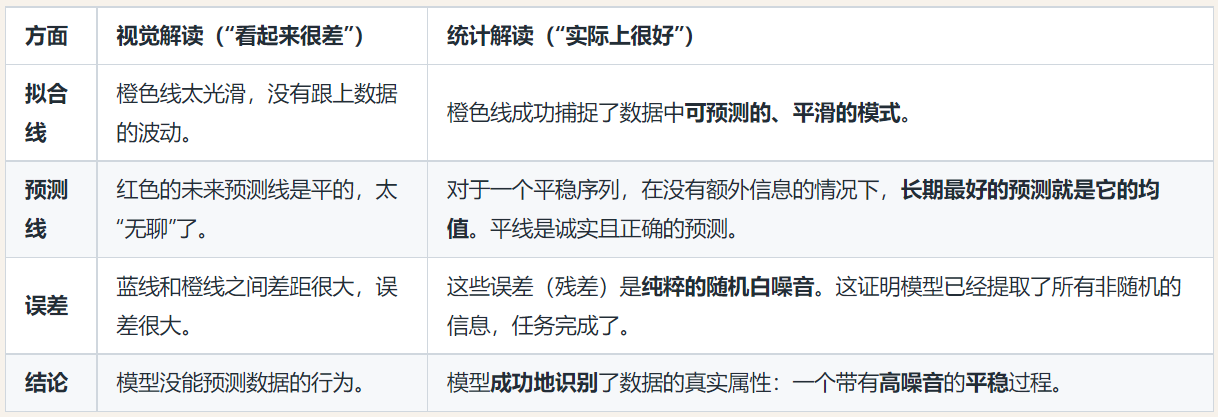

在时间序列分析中，我们的目标不是创造一个能“复制”历史的“复印机”（过拟合），而是要打造一个能“理解”历史规律的“侦探”（好模型）。这个“侦探”能区分出哪些是线索（模式），哪些是干扰项（噪音）。因此，一个好的模型的残差，必须像白噪音一样“无聊”和“不可预测”。这正是我们在这个例子中看到的。

现在我们来解读下这个输出的表

先看表头，SARIMAX Results    

在 statsmodels 库的现代版本中，ARIMA、SARIMA 和 SARIMAX 的后端实现被统一到了一个强大的 SARIMAX 类中。你可以把它理解成一个“全能型”模型引擎。所以结果显示 SARIMAX Results

SARIMAX 是 Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors 的缩写。它是最通用的模型，包含了：
- ARIMA(p,d,q): 非季节性部分。
- Seasonal(P,D,Q,m): 季节性部分。
- eXogenous(X): 外部变量（例如，用天气温度来预测冰淇淋销量）。

简单来说：ARIMA 是 SARIMAX 的一个特例。

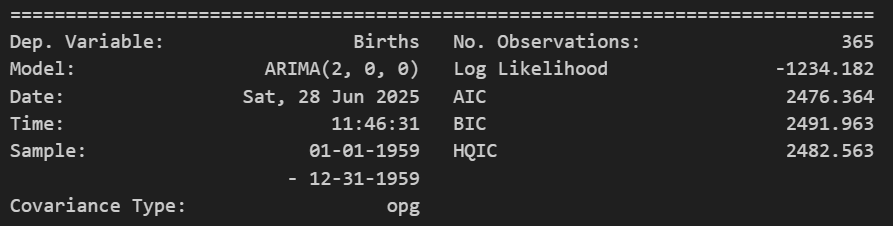
这部分是模型的概述图

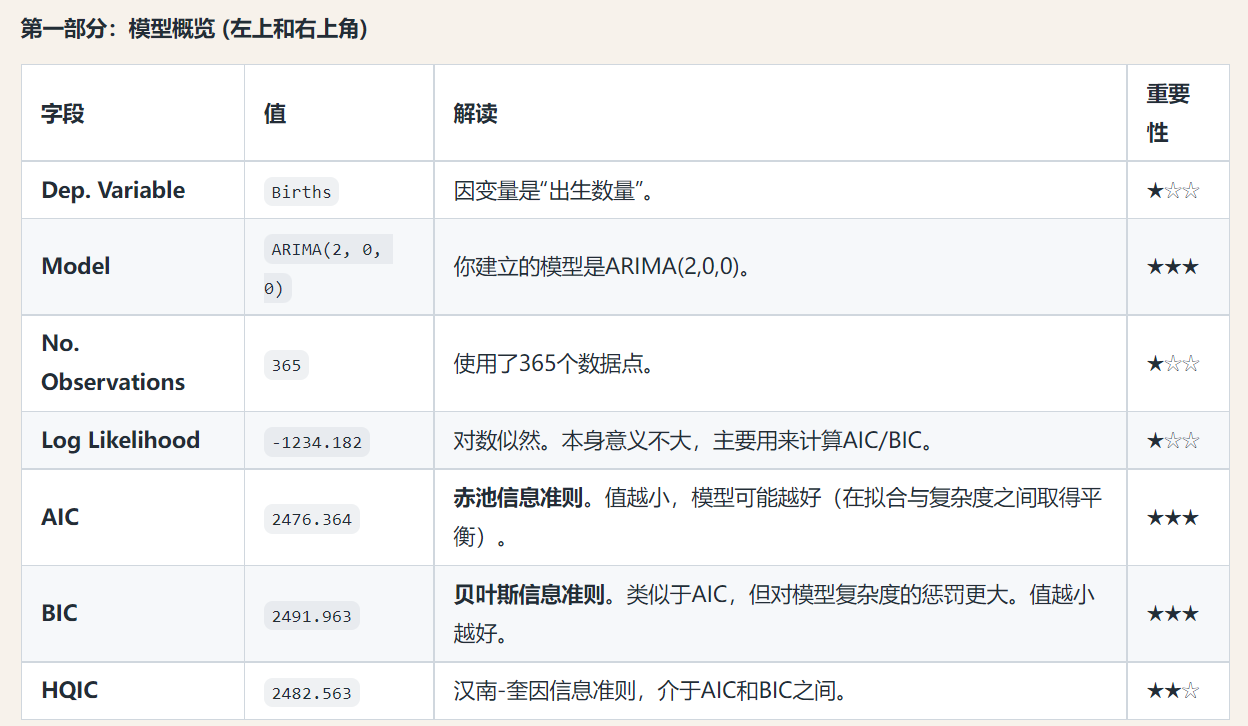

核心看点：AIC 和 BIC。当你在比较不同模型时（比如 ARIMA(2,0,0) vs ARIMA(1,0,1)），这两个值是选择“最佳”模型的重要依据。

然后看第二部分

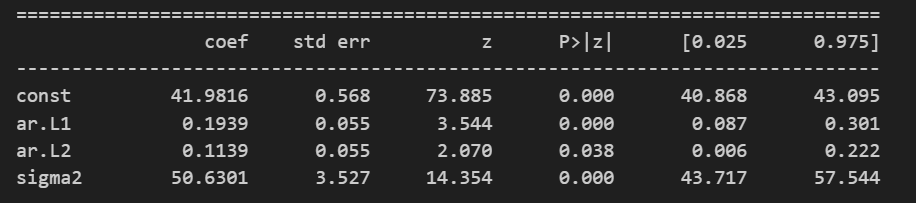



这是模型的核心参数部分，告诉我们模型具体学到了什么。

- coef (系数): 这是模型计算出的每个参数的值。
    - const: 常数项/截距。可以理解为序列的基准水平或均值，这里是 41.98，和我们之前图上看到的均值差不多。
    - ar.L1: 滞后1阶的自回归项 (AR) 系数 φ₁。值为 0.1939。
    - ar.L2: 滞后2阶的自回归项 (AR) 系数 φ₂。值为 0.1139。
    - sigma2: 模型残差的方差。值越小说明模型的拟合误差越小。

- P>|z| (p值): 这是最重要的列！ 它检验的是“该系数是否显著不为0”。判断标准: 如果 p值 < 0.05，我们就可以认为这个系数是统计上显著的，它对模型是有贡献的。
    - const 的 p值为 0.000，非常显著。
    - ar.L1 的 p值为 0.000，非常显著。
    - ar.L2 的 p值为 0.038，小于0.05，也是显著的。


在理解上述参数后，此时还有标准差和置信区间这2个参数。

coef 列的值，比如 ar.L1 的 0.1939，是模型通过计算得出的 最有可能的、最佳的估计值。std err（标准误差）衡量的是 系数估计值的不确定性或“抖动幅度”。std err 越小，说明我们的估计越精确、越稳定。如果换一份数据，估计出的系数也不会跑偏太远。这就像一个经验丰富的射手，每次射击都紧紧围绕靶心。std err 是 0.055。这是一个相对较小的值，表明对 0.1939 这个估计是比较有信心的。

[0.087 0.301] 是 ar.L1 系数的 95%置信区间。它的含义是：我们有95%的信心相信，ar.L1 这个参数 真正的、未知的值 落在这个区间之内。我们的最佳估计值 0.1939 只是这个区间中的一个点（通常是中心点）。真实的参数值可能比它大一点，也可能小一点，但很大概率不会超出 [0.087, 0.301] 这个范围。此外，如果置信区间完全不包含0 (像这里的 [0.087, 0.301])，就说明我们有95%的信心断定，这个系数的真实值不是0。这等价于p值小于0.05，即系数是显著的。如果置信区间包含了0 (例如，[-0.1, 0.2])，那就意味着0是一个可能的真实值。我们无法排除“这个系数其实是0，对模型没有作用”的可能性。这等价于p值大于0.05，即系数是不显著的。这2个判断方法是等价的。

结论: 我们选择的 p=2 是合理的，因为两个AR项都是显著的。

第三部分：残差诊断检验
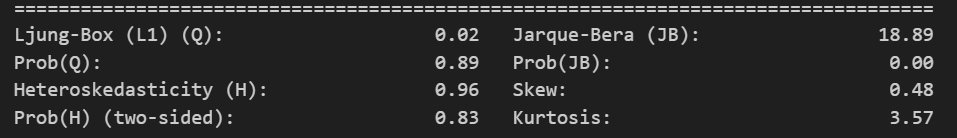

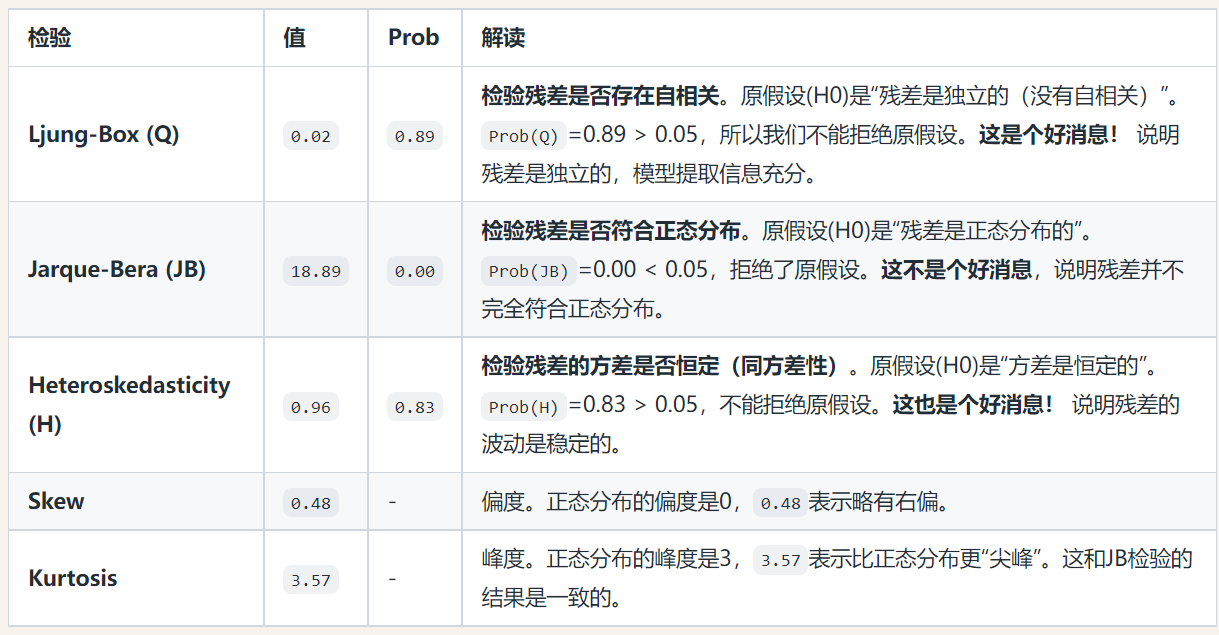

好的残差：应该是模型“吃剩下的、完全没有营养的、随机的白噪声（White Noise）”。如果还剩下隐藏的线索（非白噪声） -> 说明侦探有疏漏，模型还有改进空间。

白噪声的要求：
1. 无自相关
2. 方差恒定--如果方差不恒定（比如，越到近期，误差波动越大），说明你的模型在某些时期的预测能力很不可靠。这会影响你对未来预测不确定性的估计。残差随时间变化的图应该像一条宽度稳定的“带子”，而不是一个“喇叭口”或“纺锤”。在检验上对应着：异方差性检验 (Heteroskedasticity test) 的p值应大于0.05。
3. 均值为0--避免系统性偏差 

锦上添花的附加条件：服从正态分布，它主要用于构建准确的预测区间 (Prediction Intervals)。如果残差是正态的，我们就能更有信心地说“未来的值有95%的概率落在某个区间内”。



## 2.2 国际航空乘客数量实战

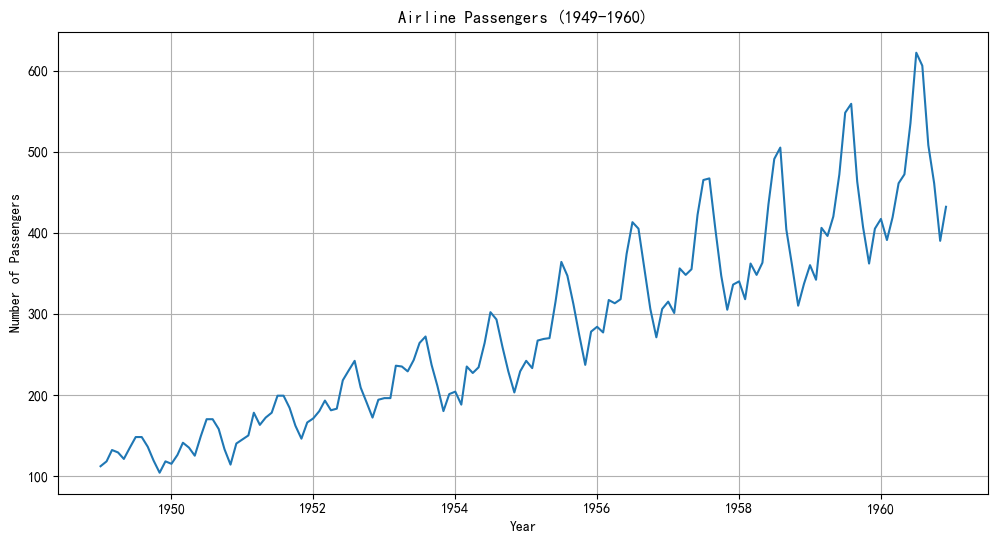

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings("ignore") # 忽略一些模型拟合时产生的警告信息
# 加载数据
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_air = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df_air.rename(columns={'#Passengers': 'Passengers'}, inplace=True) # 列名简化

# 绘制原始数据
plt.figure(figsize=(12, 6))
plt.plot(df_air['Passengers'])
plt.title('Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


arima无法处理季节性（没有内置季节性差分，只有n阶差分），所以需要先手动处理季节性。

能看到季节性的幅度越来越大，这是一种乘性效应。对数变换是处理这种情况的标准方法，它可以将乘性关系变为加性关系，从而稳定方差。



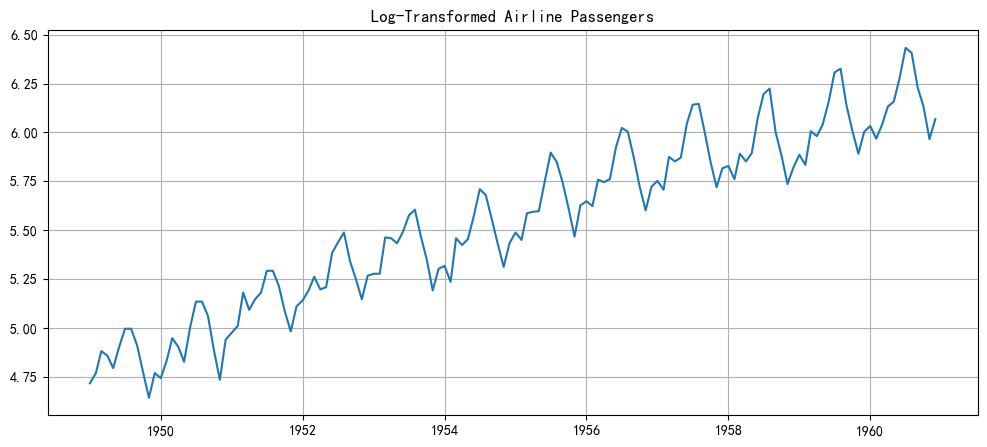

In [40]:
# 对数变换
df_air['log_passengers'] = np.log(df_air['Passengers'])

plt.figure(figsize=(12, 5))
plt.plot(df_air['log_passengers'])
plt.title('Log-Transformed Airline Passengers')
plt.grid(True)
plt.show()

现在，波动的幅度看起来稳定多了，但趋势和季节性依然存在。

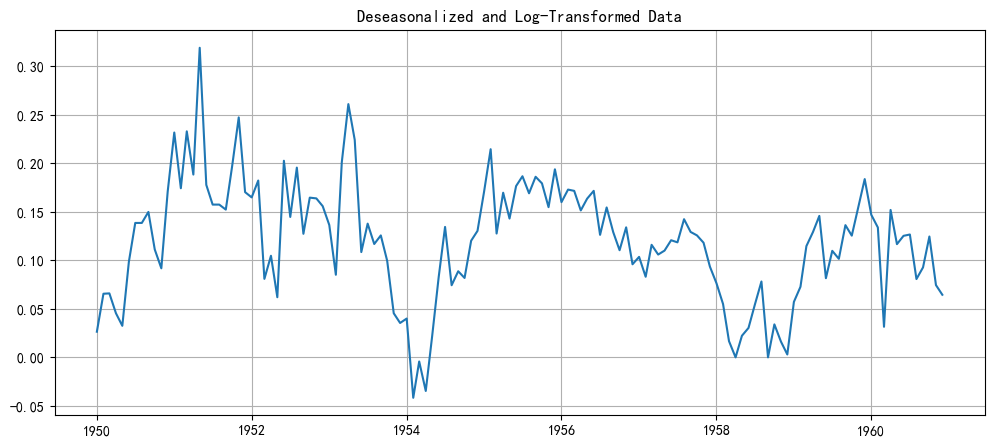

In [41]:
# 季节性差分 (m=12)
df_air['log_seasonal_diff'] = df_air['log_passengers'].diff(12)

# 丢掉因差分产生的NaN值
deseasonalized_data = df_air['log_seasonal_diff'].dropna()

plt.figure(figsize=(12, 5))
plt.plot(deseasonalized_data)
plt.title('Deseasonalized and Log-Transformed Data')
plt.grid(True)
plt.show()

我们成功地去除了季节性模式。现在的数据看起来就像一个有线性趋势的普通时间序列。这种数据正是标准ARIMA模型擅长处理的。

现在，我们为这个 deseasonalized_data 序列选择 (p, d, q) 参数

确定d（差分阶数）: 从上图看，数据仍然有明显的上升趋势，所以它不是平稳的。我们需要进行一阶差分来消除这个趋势。因此，d=1。

确定p和q: 我们对差分一次后的序列绘制ACF和PACF图来确定 p 和 q。

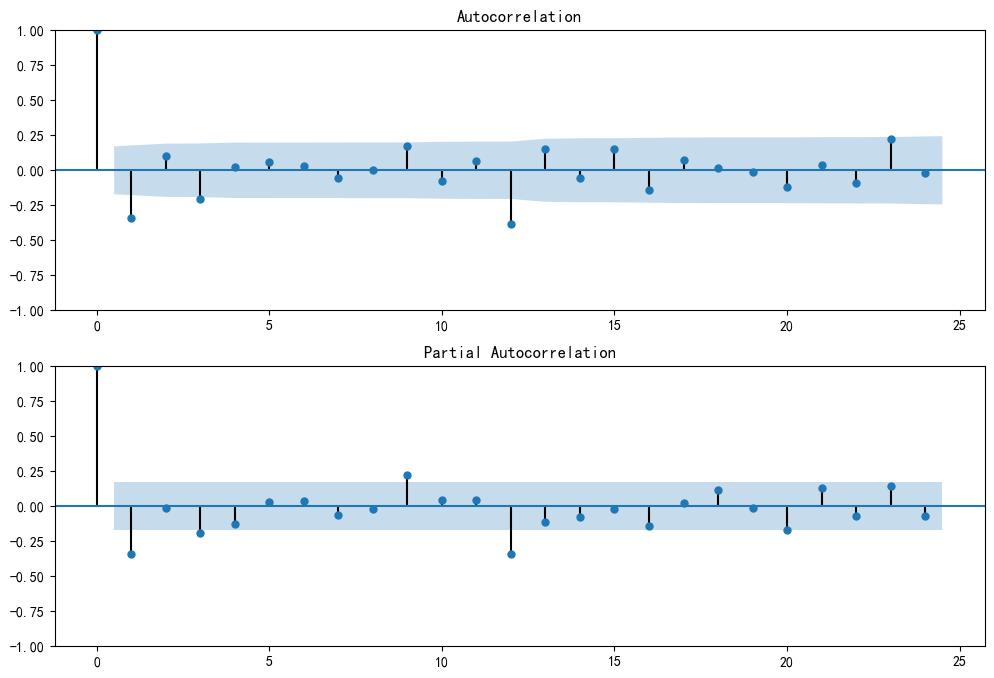

In [42]:
# 对去季节性的数据再进行一阶差分，使其平稳
stationary_data = deseasonalized_data.diff(1).dropna()

# 绘制ACF和PACF图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(stationary_data, lags=24, ax=ax1)
plot_pacf(stationary_data, lags=24, ax=ax2)
plt.show()


PACF图: 在滞后1阶后迅速截尾（降到置信区间内）。这强烈暗示 p=1。

ACF图: 在滞后1阶后也迅速截尾。这强烈暗示 q=1。

因此，我们为这个预处理后的数据选择的模型是 ARIMA(1, 1, 1)。

ps：这里其实可以看到在12阶的时候超出了置信区间，实际上这个尖峰是残余的季节性信号。即使我们已经做了一次季节性差分 (.diff(12))，数据中仍然保留着一些与12个月前相关的模式。换句话-说，我们手动进行的季节性差分并没有100%完全地消除季节性影响。

我们将使用数据的前11年（到1959年底）作为训练集，最后1年（1960年）作为测试集来验证我们的预测。

In [43]:

from statsmodels.tsa.arima.model import ARIMA

# 准备训练数据（经过预处理的）
# 注意：我们是对去季节性的数据进行建模
train_data = deseasonalized_data[:'1959']

# 定义并拟合ARIMA(1,1,1)模型
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

# 预测未来12个点（1960年全年）
# 模型预测的是经过变换后的数据
forecast_diff = model_fit.forecast(steps=12)


                               SARIMAX Results                                
Dep. Variable:      log_seasonal_diff   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 206.898
Date:                Sun, 29 Jun 2025   AIC                           -407.797
Time:                        16:08:33   BIC                           -399.459
Sample:                    01-01-1950   HQIC                          -404.411
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5365      0.260     -2.062      0.039      -1.046      -0.027
ma.L1          0.2535      0.300      0.844      0.399      -0.335       0.842
sigma2         0.0018      0.000      9.171      0.0

可以看到，这里ma(1)不显著，所以q=0 ，我们应该尝试一个更简单的模型：ARIMA(1, 1, 0)。

In [44]:
# 重新拟合一个更简单的模型 ARIMA(1, 1, 0)
model_simplified = ARIMA(train_data, order=(1, 1, 0))
model_fit_simplified = model_simplified.fit()
print(model_fit_simplified.summary())

# 比较两个模型的AIC
# 原模型 ARIMA(1,1,1) 的 AIC: -407.797
# 简化模型 ARIMA(1,1,0) 的 AIC 会是多少？
# (运行代码后，ARIMA(1,1,0)的AIC大约是-408.8，比-407.797更小)


                               SARIMAX Results                                
Dep. Variable:      log_seasonal_diff   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 206.811
Date:                Sun, 29 Jun 2025   AIC                           -409.622
Time:                        16:08:33   BIC                           -404.064
Sample:                    01-01-1950   HQIC                          -407.365
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3174      0.068     -4.641      0.000      -0.451      -0.183
sigma2         0.0018      0.000      9.274      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.00   Jarque-

AIC是一个权衡模型拟合优度和复杂度的指标，AIC值越小，模型通常越好。

可以看到，ARIMA(1,1,0)的AIC大约是-408.8，比 ARIMA(1, 1, 1)的-407.797更小。

现在我们得到了12个预测值 forecast_diff，但这些值是“经过对数变换、季节性差分和一阶差分”后的值。我们需要一步步把它还原回去。这个过程比较繁琐，是手动处理季节性的最大难点。

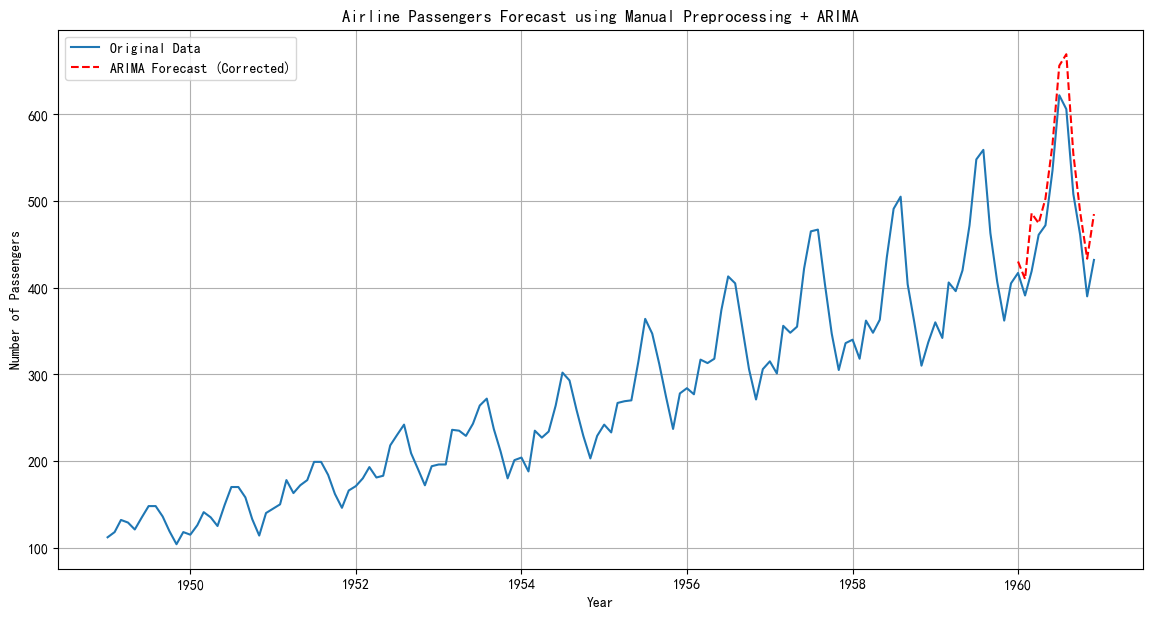

In [45]:
# 让我们给变量取个更准确的名字
# forecast_deseasonalized 是对“去季节性”序列的直接预测
forecast_deseasonalized = model_fit.forecast(steps=12)

# 逆向变换过程
predictions = []

# 逐步还原预测值
for i in range(len(forecast_deseasonalized)):
    # 1. 还原季节性差分 (直接使用预测值)
    # log(y_t) = y'_t + log(y_{t-12})
    # y'_t 就是 forecast_deseasonalized[i]
    
    # 获取12个月前的历史对数值
    last_year_log_val = df_air['log_passengers']['1959'].iloc[i]
    
    # 加上历史值，得到预测的对数值
    pred_log = forecast_deseasonalized.iloc[i] + last_year_log_val
    
    # 2. 还原对数变换 (exp)
    pred_original_scale = np.exp(pred_log)
    
    predictions.append(pred_original_scale)

# 将预测结果转换为Series，方便绘图
# 注意：forecast_deseasonalized 自带了正确的日期索引，可以直接使用
predictions_series = pd.Series(predictions, index=forecast_deseasonalized.index)

# --- 重新绘图 ---
plt.figure(figsize=(14, 7))
# 原始数据
plt.plot(df_air['Passengers'], label='Original Data')
# 我们的预测
plt.plot(predictions_series, color='red', linestyle='--', label='ARIMA Forecast (Corrected)')
plt.title('Airline Passengers Forecast using Manual Preprocessing + ARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


时间序列建模的迭代过程：初步选择 -> 拟合检验 -> 模型修正 -> 数据还原。